In [20]:
import numpy as np
import pandas as pd
import yfinance as yf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from data_preprocessing import analyze_data_quality,detect_outliers,plot_outliers,handle_outliers

In [21]:
# Define tickers and fetch data
tickers = ['AAPL', 'GOOGL', 'IBM','AMZN']  
data = []
start_date='2020-01-01'
end_date='2023-01-01'

aapl_data = yf.download('AAPL', start=start_date, end=end_date)
googl_data = yf.download('GOOGL', start=start_date, end=end_date)
IBM_data = yf.download('IBM', start=start_date, end=end_date)
amzn_data = yf.download('AMZN', start=start_date, end=end_date)



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


{'missing_values': Price      Ticker
Adj Close  AAPL      0
Close      AAPL      0
High       AAPL      0
Low        AAPL      0
Open       AAPL      0
Volume     AAPL      0
dtype: int64, 'missing_percentage': Price      Ticker
Adj Close  AAPL      0.0
Close      AAPL      0.0
High       AAPL      0.0
Low        AAPL      0.0
Open       AAPL      0.0
Volume     AAPL      0.0
dtype: float64, 'descriptive_stats': Price    Adj Close       Close        High         Low        Open  \
Ticker        AAPL        AAPL        AAPL        AAPL        AAPL   
count   756.000000  756.000000  756.000000  756.000000  756.000000   
mean    127.940988  130.311812  131.892775  128.614983  130.231998   
std      30.494847   30.566496   30.841435   30.287325   30.596429   
min      54.509758   56.092499   57.125000   53.152500   57.020000   
25%     112.981398  115.739374  117.275000  114.129997  115.924374   
50%     133.331619  135.379997  137.200005  133.750000  135.794998   
75%     148.579060  150.

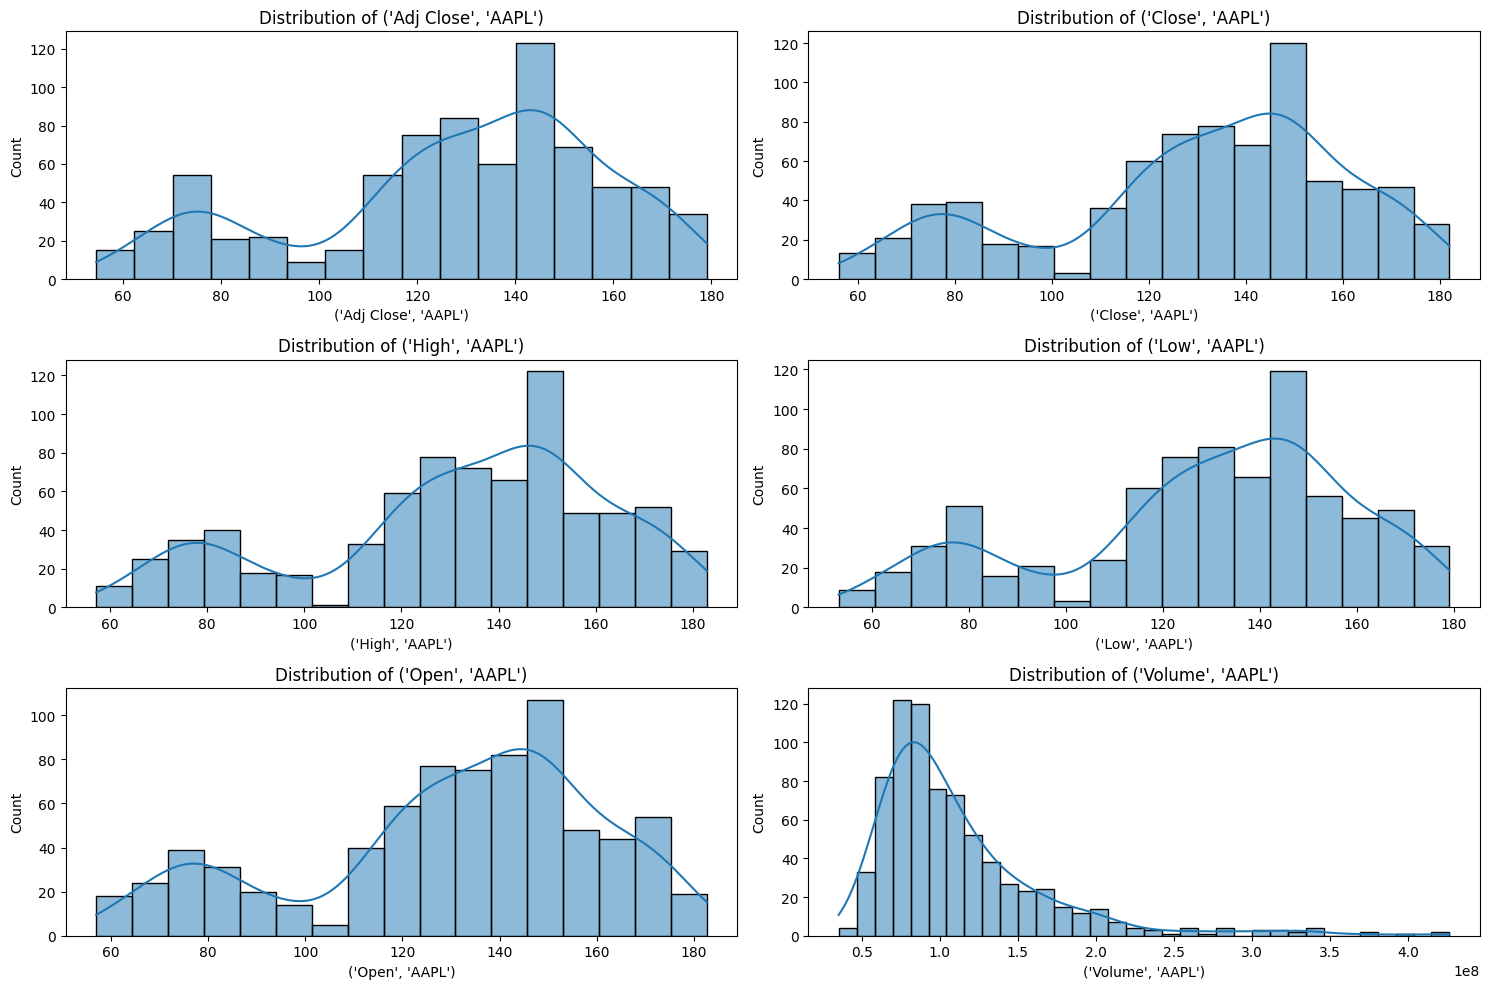

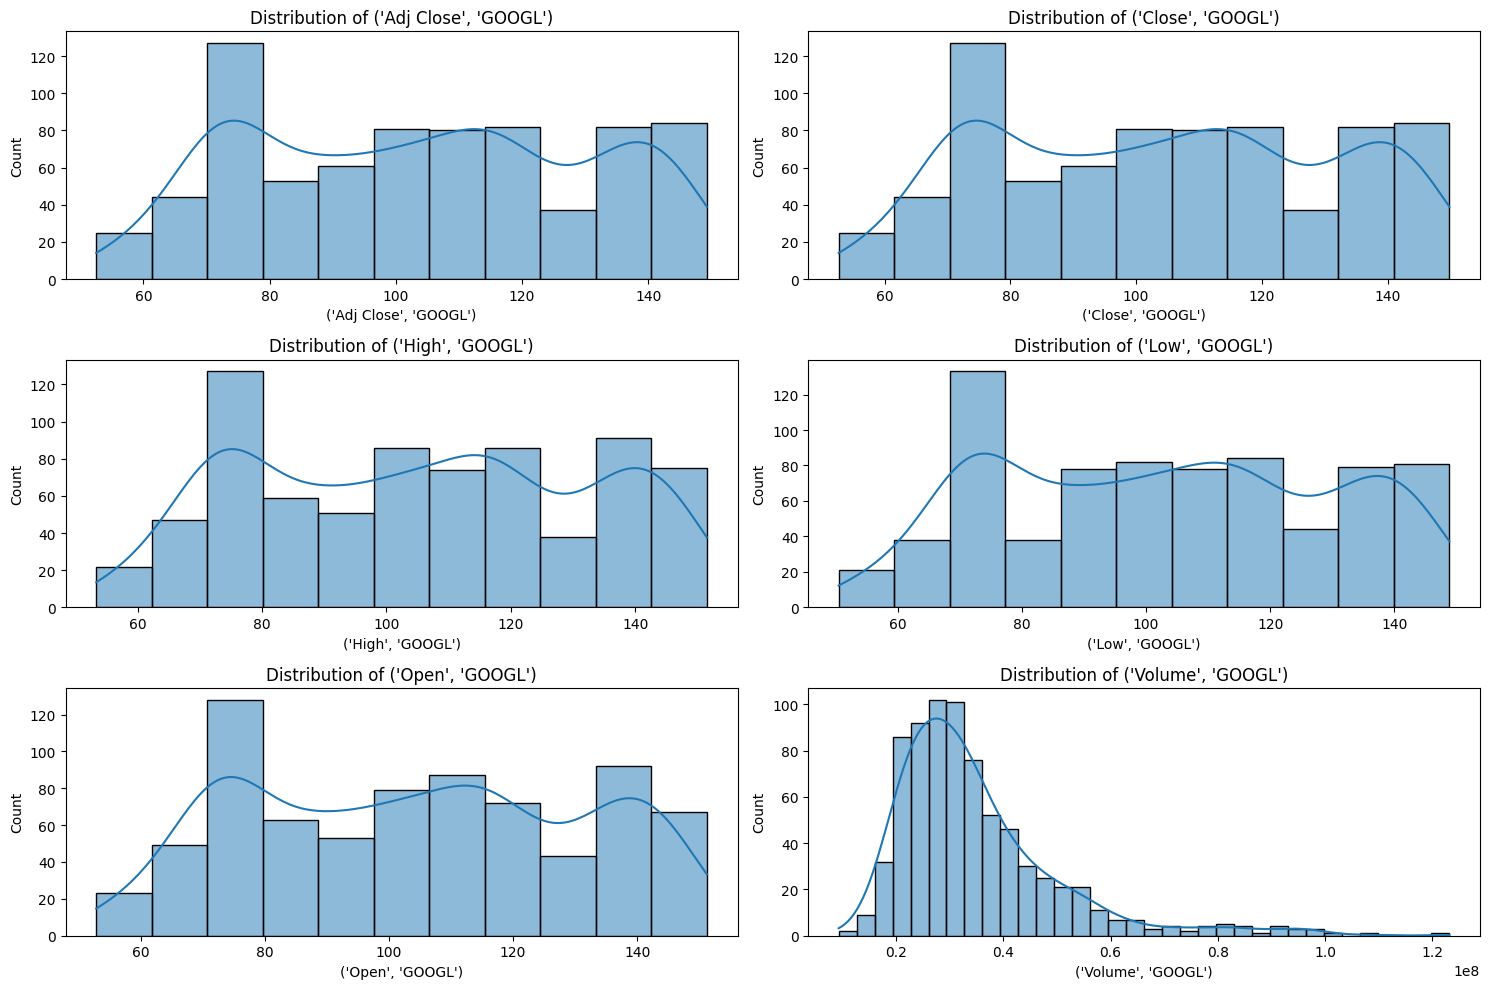

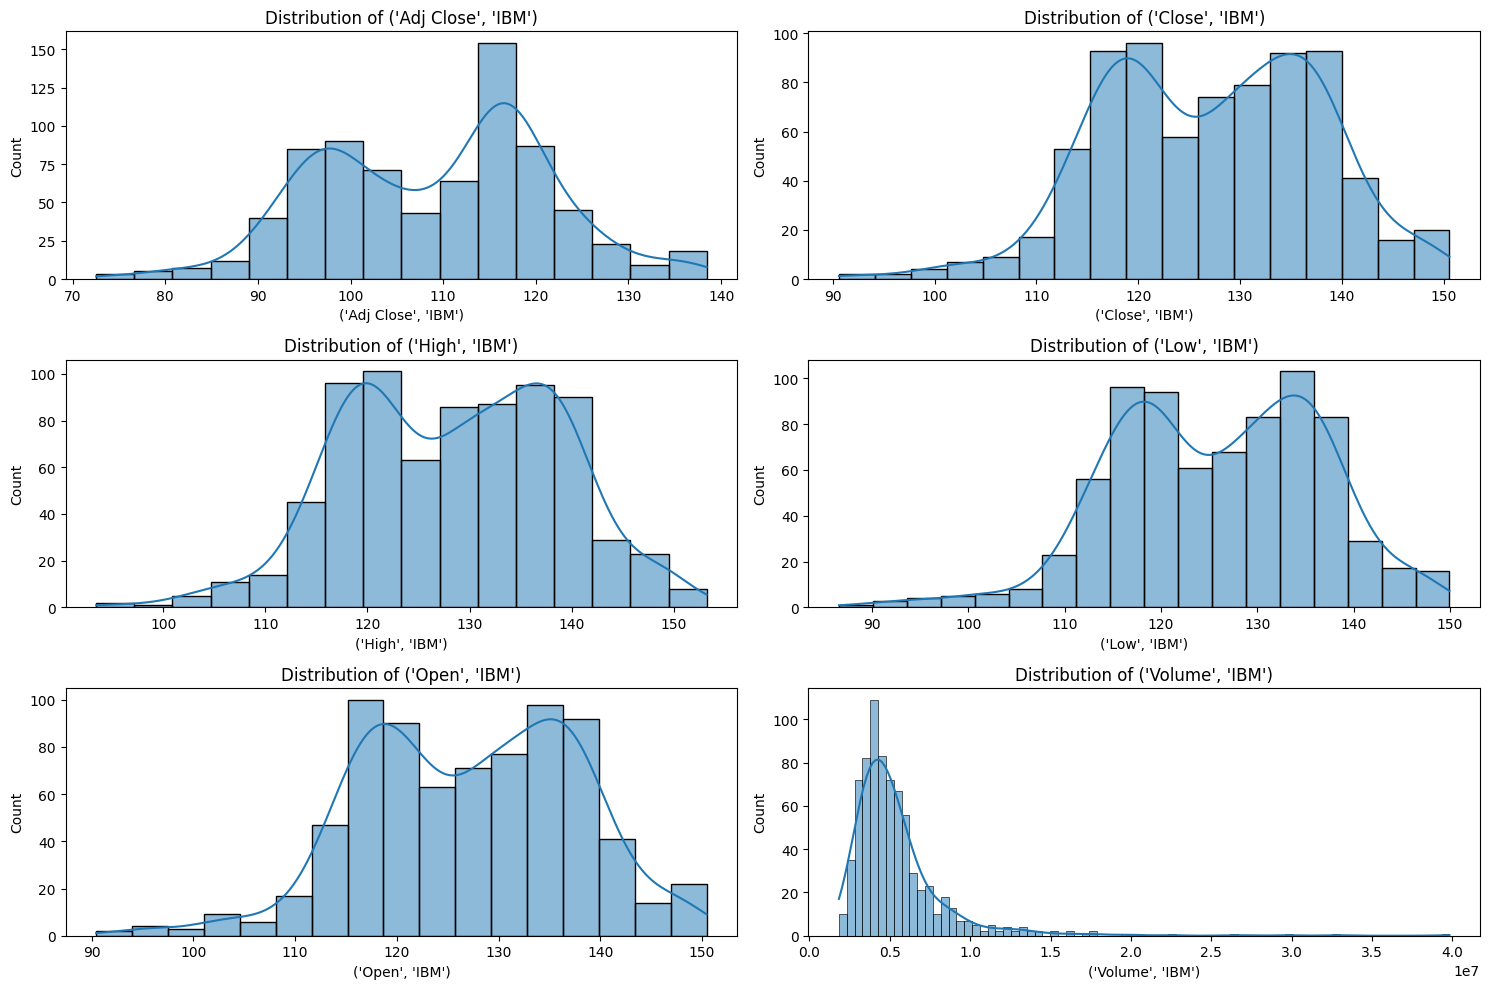

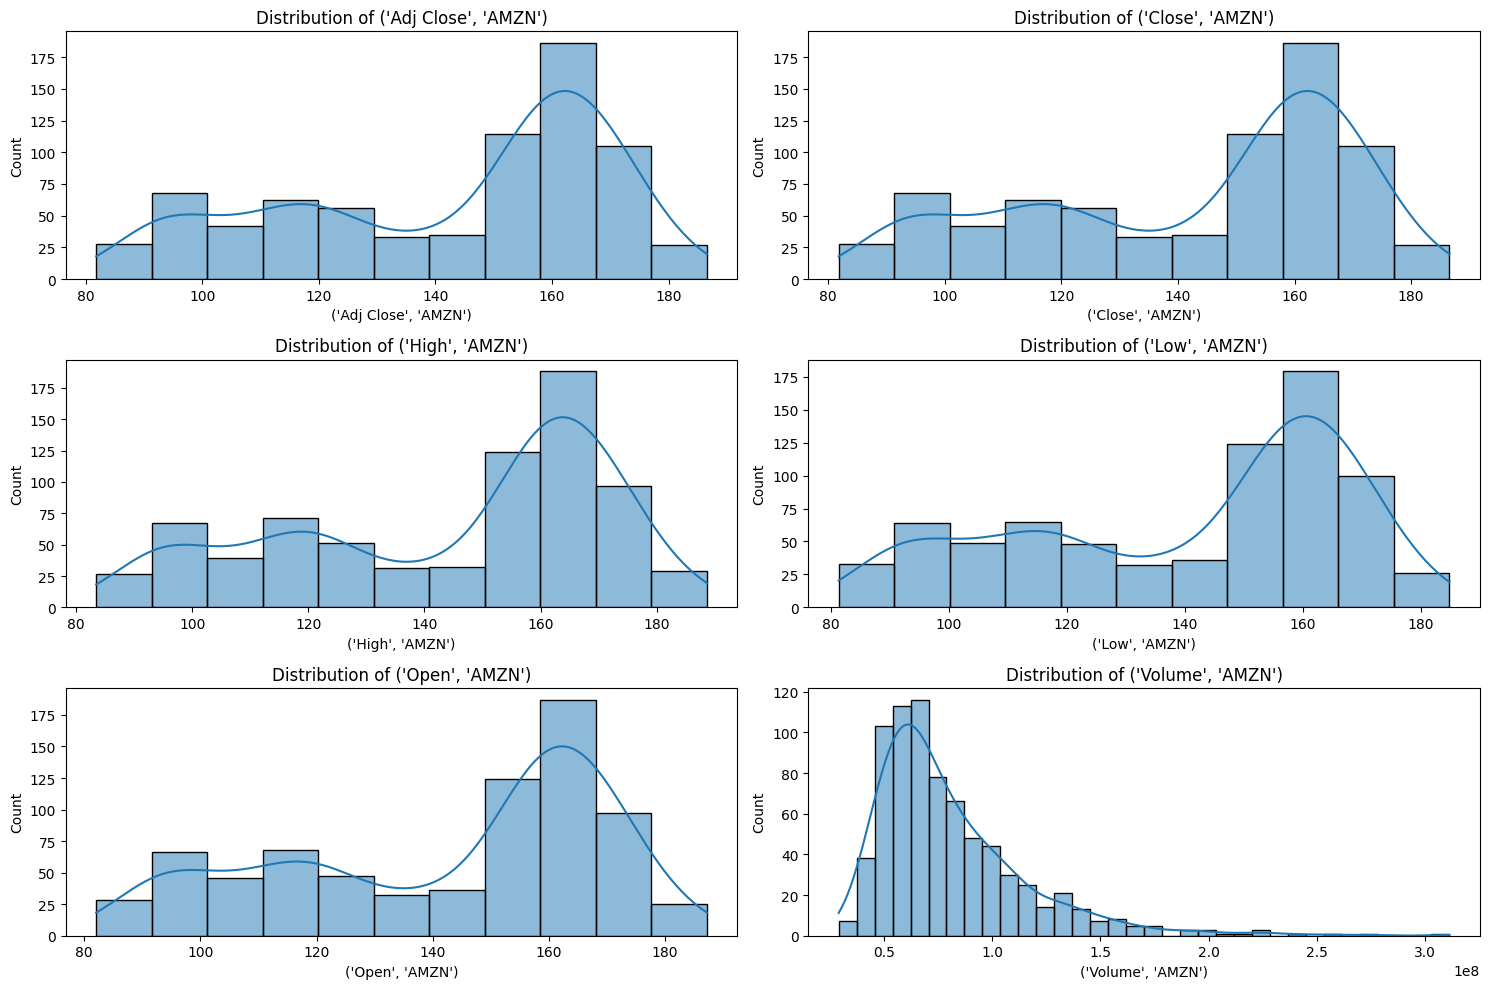

In [22]:
print(analyze_data_quality(aapl_data))
print(analyze_data_quality(googl_data))
print(analyze_data_quality(IBM_data))
print(analyze_data_quality(amzn_data))

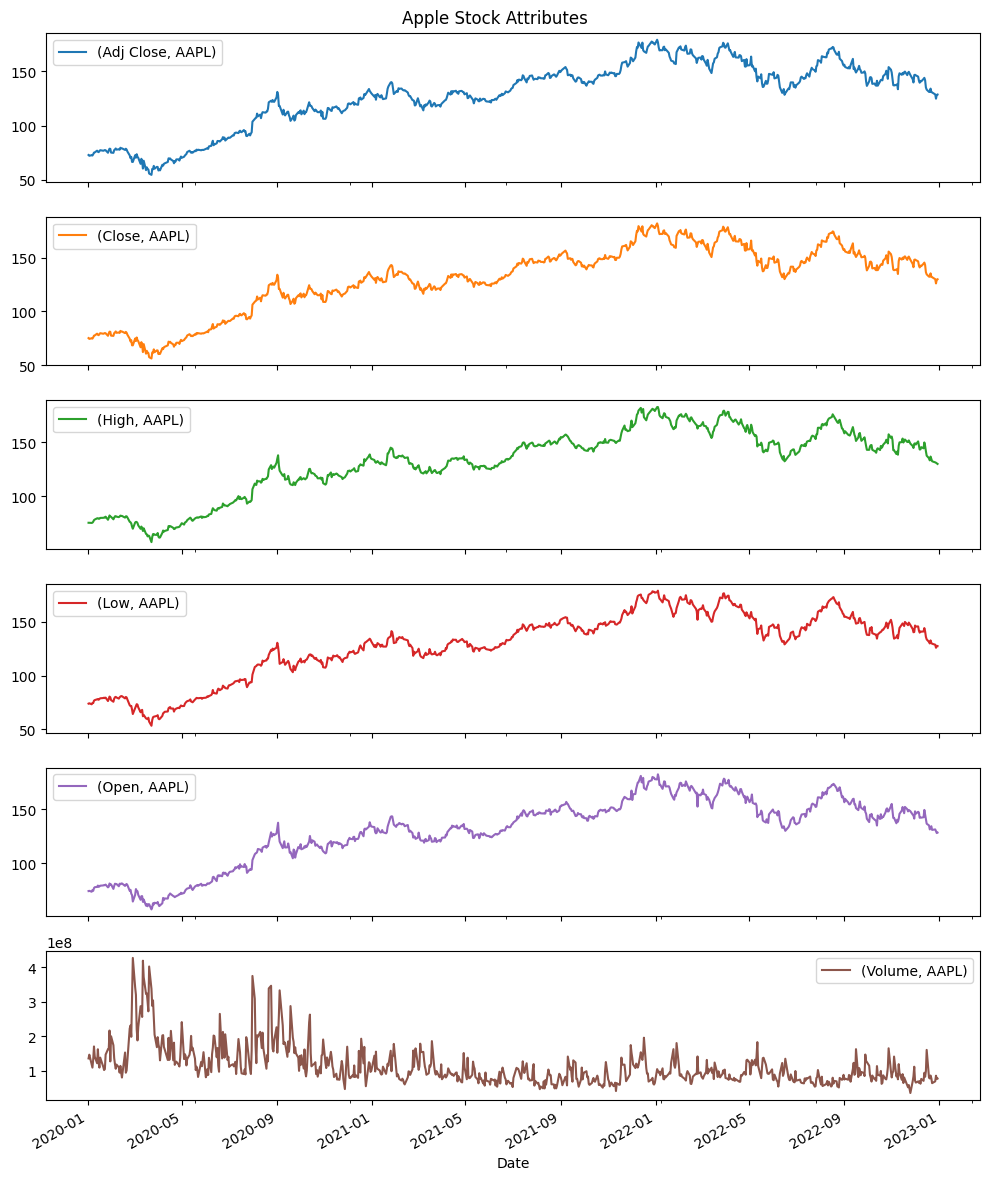

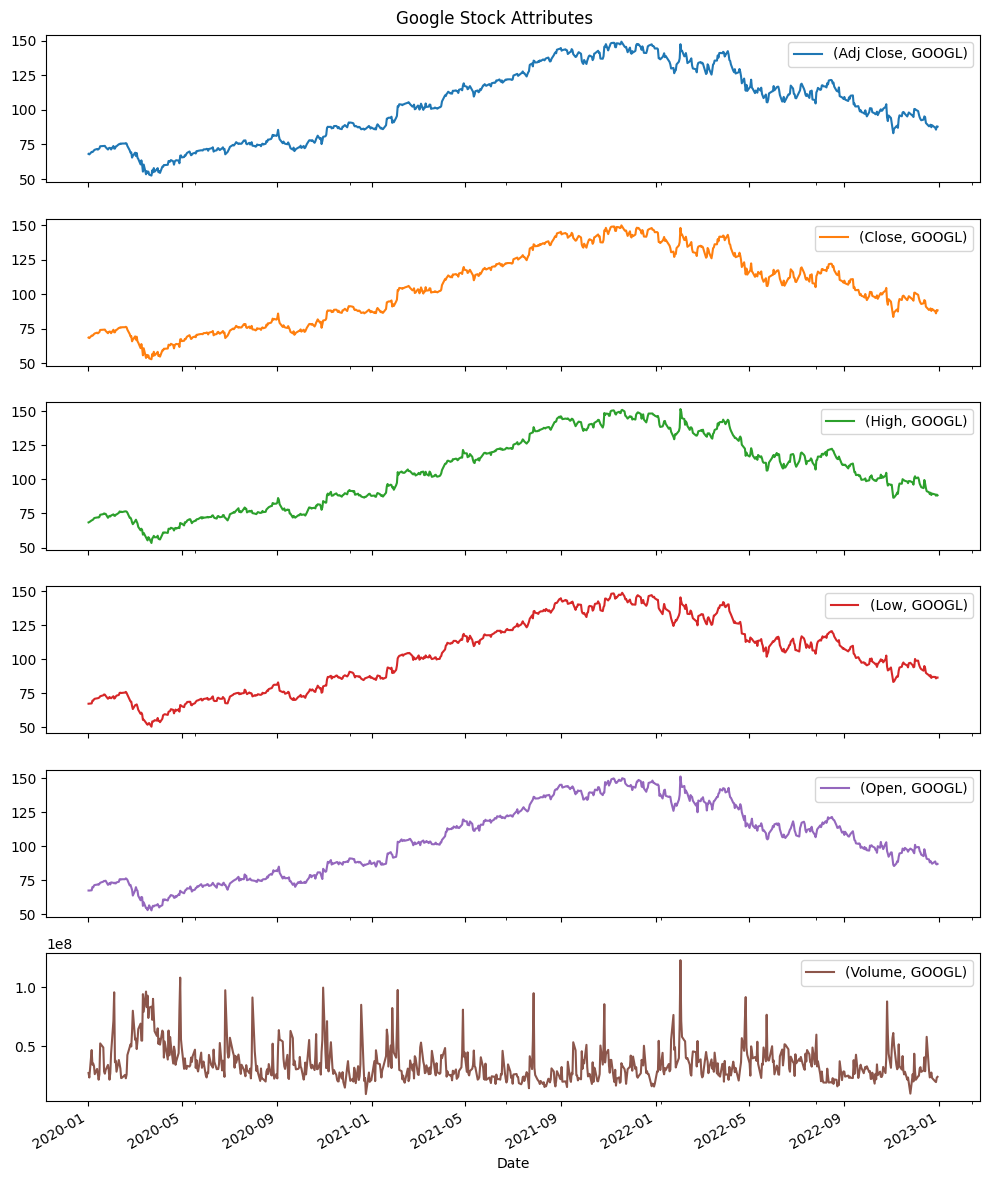

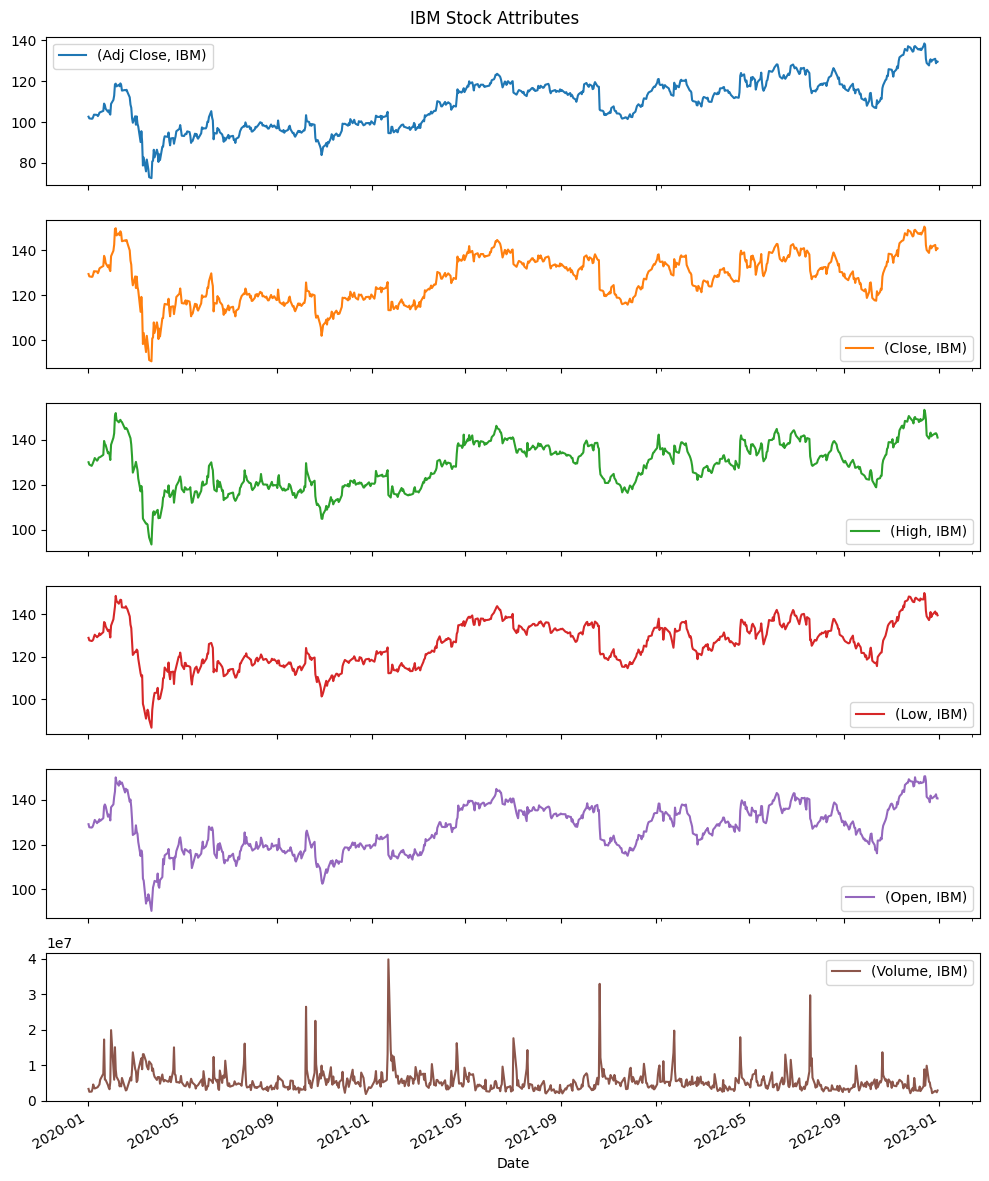

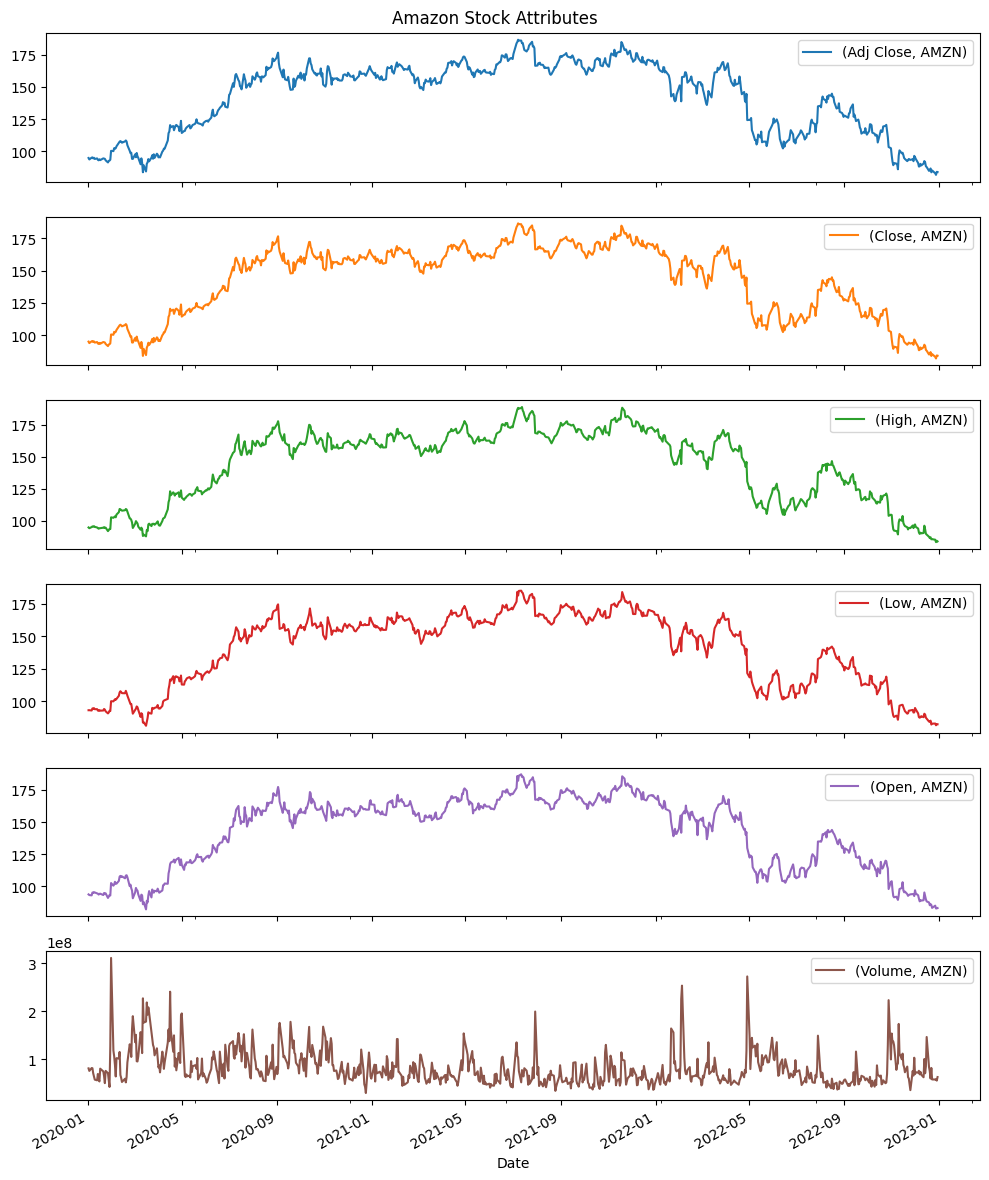

In [23]:
import matplotlib.pyplot as plt

# Plot AAPL data
aapl_data.plot(subplots=True, figsize=(10, 12))
plt.suptitle("Apple Stock Attributes")  # Add a title for the entire figure
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

# Plot GOOGL data
googl_data.plot(subplots=True, figsize=(10, 12))
plt.suptitle("Google Stock Attributes")
plt.tight_layout()
plt.show()

# Plot IBM data
IBM_data.plot(subplots=True, figsize=(10, 12))
plt.suptitle("IBM Stock Attributes")
plt.tight_layout()
plt.show()

# Plot AMZN data
amzn_data.plot(subplots=True, figsize=(10, 12))
plt.suptitle("Amazon Stock Attributes")
plt.tight_layout()
plt.show()

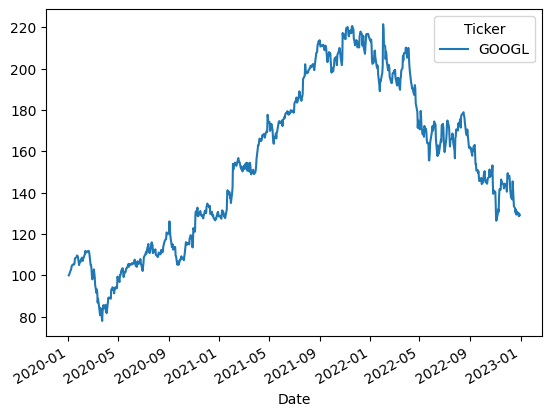

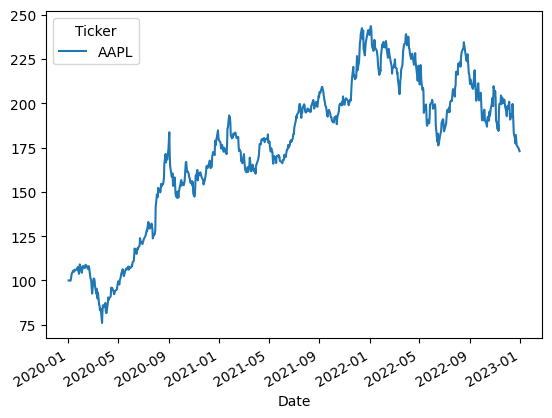

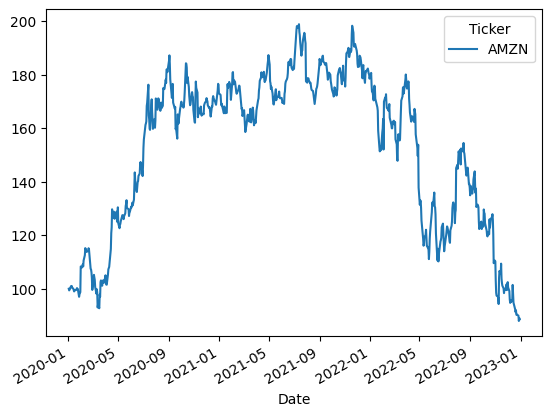

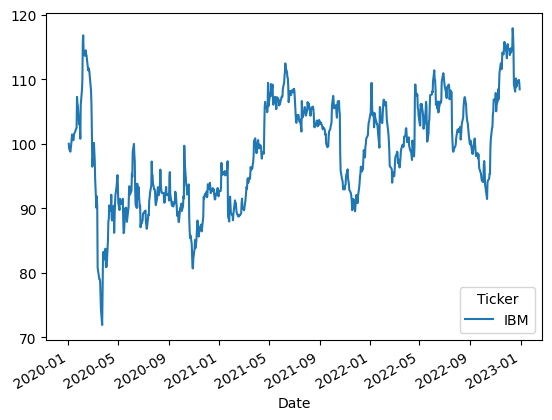

In [35]:
# Normalizing and comparison
# Both stocks start from 100
normalized_google = googl_data.High.div(googl_data.High.iloc[0]).mul(100)
normalized_apple = aapl_data.High.div(aapl_data.High.iloc[0]).mul(100)
normalized_amazon = amzn_data.High.div(amzn_data.High.iloc[0]).mul(100)
normalized_ibm = IBM_data.High.div(IBM_data.High.iloc[0]).mul(100)
normalized_google.plot()
normalized_apple.plot()
normalized_amazon.plot()
normalized_ibm.plot()
plt.show()